# Football Analyses

In [6]:
# importing used libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

In [7]:
df_coaches = pd.read_json('coaches.json',encoding='utf-8')
df_coaches.head()

,wyId,shortName,firstName,middleName,lastName,birthDate,birthArea,passportArea,currentTeamId
0,275580,Cesar Domingo,César Domingo,,Mendiondo López,None,"{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...","{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...",0
1,14710,J. Heynckes,Josef,,Heynckes,1945-05-09,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...","{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",0
2,135480,G. De Biasi,Giovanni,,De Biasi,1956-06-16,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...","{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",0
3,210074,Marcelino,Marcelino,,García Toral,1965-08-14,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",674
4,293398,T. Korkut,Tayfun,,Korkut,1974-04-02,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...","{'id': 792, 'alpha2code': 'TR', 'alpha3code': ...",0


In [8]:
df_players = pd.read_json('players_new.json',encoding='utf-8')
df_players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konaté,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konaté,null


In [9]:
df_teams = pd.read_json('teams_new.json',encoding='utf-8')
df_teams.head()

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alavés,696,Deportivo Alavés,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [10]:
df_events_PL = pd.read_json('events_England.json',encoding='utf-8')
df_events_PL.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175


In [20]:
df_matches_PL = pd.read_json('matches_England.json',encoding='utf-8')
df_matches_PL.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,1659,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,1628,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,1609,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,1612,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,1611,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364


In [21]:
# Let's work with the df_matches_PL dataset

In [22]:
# here we split the column 'label' and create 4 lists containing the splitted information (home team, awayteam,
# home score and away score), for each game of the season

home_teams = []
away_teams = []
home_scores = []
away_scores = []


for index,row in df_matches_PL.iterrows():
    home_teams.append(row['label'].replace(',','-').split('-')[0].strip())
    away_teams.append(row['label'].replace(',','-').split('-')[1].strip())
    home_scores.append(row['label'].replace(',','-').split('-')[2].strip())
    away_scores.append(row['label'].replace(',','-').split('-')[3].strip())
    

In [23]:
# we create new columns in the df, containing the lists we just created

df_matches_PL['home_team'] = home_teams
df_matches_PL['away_team'] = away_teams
df_matches_PL['home_score'] = home_scores
df_matches_PL['away_score'] = away_scores

In [24]:
df_matches_PL.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId,home_team,away_team,home_score,away_score
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,1659,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364,Burnley,AFC Bournemouth,1,2
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,1628,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364,Crystal Palace,West Bromwich Albion,2,0
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,1609,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364,Huddersfield Town,Arsenal,0,1
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,1612,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364,Liverpool,Brighton & Hove Albion,4,0
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,1611,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364,Manchester United,Watford,1,0


In [25]:
# we determine the winner and loser (or draw) for each game by comparing the home and away scores

winners = []
losers = []

for index,row in df_matches_PL.iterrows():
    if row['home_score'] > row['away_score']:
        winners.append(row['home_team'])
        losers.append(row['away_team'])
    elif row['home_score'] < row['away_score']:
        winners.append(row['away_team'])
        losers.append(row['home_team'])
    elif row['home_score'] == row['away_score']:
        winners.append('Draw')
        losers.append('Draw')

In [26]:
df_matches_PL['winner'] = winners
df_matches_PL['loser'] = losers

In [27]:
df_matches_PL.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId,home_team,away_team,home_score,away_score,loser
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,AFC Bournemouth,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364,Burnley,AFC Bournemouth,1,2,Burnley
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,Crystal Palace,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364,Crystal Palace,West Bromwich Albion,2,0,West Bromwich Albion
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,Arsenal,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364,Huddersfield Town,Arsenal,0,1,Huddersfield Town
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,Liverpool,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364,Liverpool,Brighton & Hove Albion,4,0,Brighton & Hove Albion
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,Manchester United,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364,Manchester United,Watford,1,0,Watford


## Who's going to win the title?

In [28]:
#Now that we have all the data we need, let's select what we will use for question 1

df_1 = df_matches_PL[['gameweek','home_team','away_team','home_score','away_score','winner','loser','label']]
df_1.head()

,gameweek,home_team,away_team,home_score,away_score,winner,loser,label
0,38,Burnley,AFC Bournemouth,1,2,AFC Bournemouth,Burnley,"Burnley - AFC Bournemouth, 1 - 2"
1,38,Crystal Palace,West Bromwich Albion,2,0,Crystal Palace,West Bromwich Albion,"Crystal Palace - West Bromwich Albion, 2 - 0"
2,38,Huddersfield Town,Arsenal,0,1,Arsenal,Huddersfield Town,"Huddersfield Town - Arsenal, 0 - 1"
3,38,Liverpool,Brighton & Hove Albion,4,0,Liverpool,Brighton & Hove Albion,"Liverpool - Brighton & Hove Albion, 4 - 0"
4,38,Manchester United,Watford,1,0,Manchester United,Watford,"Manchester United - Watford, 1 - 0"


In [29]:
df_teams.head()

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alavés,696,Deportivo Alavés,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


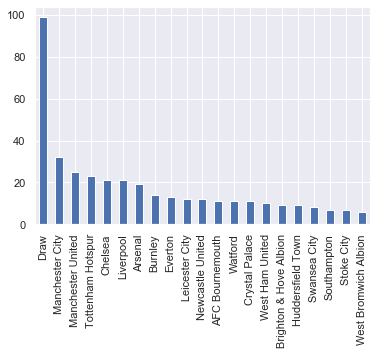

In [30]:
#just some visualization

df_1['winner'].value_counts().plot(kind='bar')
plt.show()

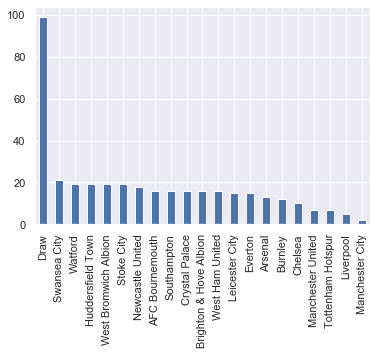

In [31]:
#just some visualization

df_1['loser'].value_counts().plot(kind='bar')
plt.show()

In [32]:
PL_teams = df_1['home_team'].tolist()
PL_teams = sorted(list(dict.fromkeys(PL_teams))) #deduplicate and sort

In [34]:
PL_teams

['AFC Bournemouth',
 'Arsenal',
 'Brighton & Hove Albion',
 'Burnley',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Huddersfield Town',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester United',
 'Newcastle United',
 'Southampton',
 'Stoke City',
 'Swansea City',
 'Tottenham Hotspur',
 'Watford',
 'West Bromwich Albion',
 'West Ham United']

In [35]:
# We create a list containing each team with its number of points at the end of the season

import pylab
from numpy import cumsum
from collections import OrderedDict

lst = []

for team in PL_teams:
    points = [0]
    dftest = df_1.loc[(df_1['home_team'] == team) | (df_1['away_team'] == team)].sort_values(by='gameweek')
    for index,row in dftest.iterrows():
        if (row['winner'] == team):
            points.append(3)
        elif (row['loser'] == team):  
            points.append(0)      
        else:
            points.append(1)
            
    
    lst.append((team,sum(points)))

# Then we sort the teams according to their points (from highest to lowest), 
# and extract the team names to have the table ranking of the league

sorted_by_second = sorted(lst, key=lambda tup: tup[1])
ordered_table = [i[0] for i in sorted_by_second]
ordered_table.reverse()

In [36]:
ordered_table

['Manchester City',
 'Manchester United',
 'Tottenham Hotspur',
 'Liverpool',
 'Chelsea',
 'Arsenal',
 'Burnley',
 'Everton',
 'Leicester City',
 'Newcastle United',
 'Crystal Palace',
 'AFC Bournemouth',
 'West Ham United',
 'Watford',
 'Brighton & Hove Albion',
 'Huddersfield Town',
 'Southampton',
 'Swansea City',
 'Stoke City',
 'West Bromwich Albion']

In [37]:
# we create two functions that will help us determine the longest streaks

def longest_winning_streak(points):

    longest = 0
    current = 0
    for num in points:
        if num == 3:
            current += 1
        else:
            longest = max(longest, current)
            current = 0

    return max(longest, current)


def longest_losing_streak(points):

    longest = 0
    current = 0
    for num in points:
        if num == 0:
            current += 1
        else:
            longest = max(longest, current)
            current = 0

    return max(longest, current)

In [38]:
# and then for each team, we append to an empty list the team name, 
# its longest winning streak, and its longest losing streak

# therefore, for each team, we append to a list the result (in points won) of each game

streaks = []

for team in ordered_table:
    points = []
    dftest = df_1.loc[(df_1['home_team'] == team) | (df_1['away_team'] == team)].sort_values(by='gameweek')
    for index,row in dftest.iterrows():
        if (row['winner'] == team):
            points.append(3)
        elif (row['loser'] == team):  
            points.append(0)      
        else:
            points.append(1)
            

    streaks.append([team,longest_winning_streak(points),longest_losing_streak(points)])

In [39]:
streaks

#1st element = team name
#2nd = longest winning streak
#3rd = longest losing streak

[['Manchester City', 18, 1],
 ['Manchester United', 4, 1],
 ['Tottenham Hotspur', 7, 1],
 ['Liverpool', 4, 1],
 ['Chelsea', 4, 2],
 ['Arsenal', 3, 3],
 ['Burnley', 3, 3],
 ['Everton', 2, 3],
 ['Leicester City', 4, 3],
 ['Newcastle United', 3, 4],
 ['Crystal Palace', 3, 7],
 ['AFC Bournemouth', 2, 4],
 ['West Ham United', 2, 3],
 ['Watford', 2, 4],
 ['Brighton & Hove Albion', 2, 3],
 ['Huddersfield Town', 2, 5],
 ['Southampton', 1, 3],
 ['Swansea City', 2, 4],
 ['Stoke City', 1, 4],
 ['West Bromwich Albion', 2, 8]]

In [40]:
# we determine the 2 teams with longest winning streaks

sorted_by_winning = sorted(streaks, key=lambda lis: lis[1])
order_winning = [i[0] for i in sorted_by_winning]
order_winning.reverse()
highest_winning_teams = order_winning[0:2]

highest_winning_teams

['Manchester City', 'Tottenham Hotspur']

In [41]:
# we determine the 2 teams with longest losing streaks

sorted_by_losing = sorted(streaks, key=lambda lis: lis[2])
order_losing = [i[0] for i in sorted_by_losing]
order_losing.reverse()
highest_losing_teams = order_losing[0:2]

highest_losing_teams

['West Bromwich Albion', 'Crystal Palace']

The 2 teams with longest winning streaks are displayed with dashed lines --- 
The 2 teams with longest losing streaks are displayed with dotted lines ...



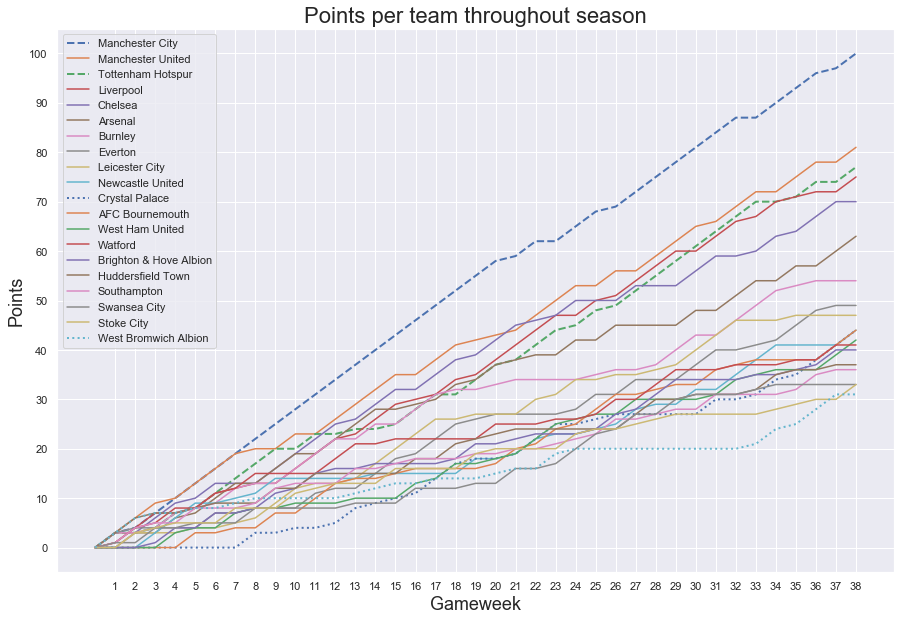

In [43]:
#Let's plot the whole thing

for team in ordered_table:
    points = [0] #we add a 0 at the beginning of the list to improve visualization 
    dftest = df_1.loc[(df_1['home_team'] == team) | (df_1['away_team'] == team)].sort_values(by='gameweek')
    for index,row in dftest.iterrows():
        if (row['winner'] == team):
            points.append(3)
        elif (row['loser'] == team):  
            points.append(0)      
        else:
            points.append(1)
    
    
    running_points = list(cumsum(points)) #we compute a running sum of each team's points to have their points after each gameweek
    
    fig = plt.figure(1, figsize=(15, 10))
    
    if team in highest_winning_teams: #we plot differently the 2 teams with longest winning streaks
        plt.plot(running_points, label = team,linestyle='dashed',linewidth=2)
    elif team in highest_losing_teams: #we plot differently the 2 teams with longest losing streaks
        plt.plot(running_points, label = team,linestyle='dotted',linewidth=2)
    else: #if no particular streak, we plot normally
        plt.plot(running_points, label = team,linestyle='solid')   

    
plt.legend()
plt.title('Points per team throughout season',size=22)
plt.xticks(np.arange(1,39))
plt.yticks(np.arange(0,105,step=10))
plt.xlabel('Gameweek',size=18)
plt.ylabel('Points',size=18)

print("The 2 teams with longest winning streaks are displayed with dashed lines --- \nThe 2 teams with longest losing streaks are displayed with dotted lines ...\n")

## Is there a home-field advantage?

In [ ]:
#We randomly choose our 5 teams

import random

temp = ordered_table.copy()
teams_list_5 = []
for i in range(5):
    teams_list_5.append(temp.pop(random.randint(0,len(temp)-1)))

In [ ]:
teams_list_5

In [ ]:
# however, as we use team names in our analysis right below, we have to select 5 teams manually
# so let's select Arsenal, Manchester City, Leicester City, Watford and Southampton

teams_list_5 = ['Arsenal','Manchester City','Leicester City','Watford','Southampton']
teams_list_5

In [ ]:
from scipy import stats

chi_list = []

for team in teams_list_5:
    df_temp = df_1.loc[(df_1['home_team'] == team) | (df_1['away_team'] == team)]
    results = []
    side = []
    for index,row in df_temp.iterrows():
        if row['winner'] != 'Draw':
            if row['winner'] == team:
                results.append('win')
            else:
                results.append("loss")
        else: 
            results.append("draw")
        if row['home_team'] == team:
            side.append("home")
        else:
            side.append("away")
    df_results = pd.DataFrame(results, columns = ["results"])
    df_sides = pd.DataFrame(side, columns = ["side"])
    df_concat = pd.concat([df_results, df_sides], axis = 1)
    df_crosstab = pd.crosstab(df_concat['side'],df_concat['results'])      
    f_obs = np.array([df_crosstab.iloc[0][1:3].values,df_crosstab.iloc[1][1:3].values])
    
    print(team,df_crosstab,'',sep='\n')

    chi_list.append([team,stats.chi2_contingency(f_obs)[0:3]])

In [ ]:
chi_list[0]

#after team's name, the third value is the p-value

#### Null hypothesis H0 is that the field doesn't significantly impact the result. We can reject it if the p-value < 0,05
#### We notice that the first p-value (from Arsenal) is significantly lower than 0,05, which enables us to reject the null hypothesis and state that the field significantly impact on Arsenal's results. Indeed, if we take a look at their results we can see that they won almost all their home games (15 out of 19), and lost a lot of away games (11 out of 19), which confirms the huge impact of the field

In [ ]:
chi_list[1]

#after team's name, the third value is the p-value

#### Null hypothesis H0 is that the field doesn't significantly impact the result. We can reject it if the p-value < 0,05

#### If we take a look at other teams and p-values, we even have a p-value of 1 for Manchester City (which is normal considering that they have exactly the same number of draw, loss and wins at home and away). This is a totally opposite result compared to Arsenal

## RQ3) Which teams have the youngest coaches?

In [ ]:
df_coaches

In [ ]:
df_teams

In [ ]:
#we only keep Premier League teams

df_teams_PL = df_teams.loc[df_teams['name'].isin(PL_teams)].reset_index(drop=True)
df_teams_PL

In [ ]:
df_teams_coaches = pd.merge(df_teams_PL, df_coaches, left_on='wyId', right_on='currentTeamId')
df_teams_coaches

In [ ]:
#We notice we only have 14 coaches for Premier League, with Newcastle even having 2 coaches ==> only 13 clubs have a coach

In [ ]:
#Let's only keep useful columns to simplify

df_3_2 = df_teams_coaches[['name','birthDate','shortName']]

In [ ]:
df_3_2

In [ ]:
# we create a function computing the age from a given date

from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [ ]:
# then we calculate the age of each coach

age_list = []
date_list = []

for index,row in df_3_2.iterrows():
    date_format = row['birthDate'].split('-')
    age_list.append(calculate_age(date(int(date_format[0]),int(date_format[1]),int(date_format[2]))))

In [ ]:
df_3_2['age'] = age_list

In [ ]:
# Show only first 10 teams with youngest coaches

df_3_2.sort_values(by=['birthDate'],ascending=False).head(n=10).reset_index(drop=True)

In [ ]:
# Plotting the boxplot

df_3_2.boxplot(column=['age'])
plt.show()

In [ ]:
# However having only 14 coaches is not enough. Let's try to get our coaches data in another way

In [ ]:
df_matches_PL

In [ ]:
# We dig into the 'teamsData' to extract the coach of each home and away team, 
# using the powerful re library and some regular expressions

home_coach = []
away_coach = []

for index,row in df_matches_PL.iterrows():
    text = str(row['teamsData'])
    ids = re.findall('coachId(.+?),', text)
    coachId1 = int(re.findall('\d+',ids[0])[0])
    coachId2 = int(re.findall('\d+',ids[1])[0])
    sides = re.findall('side(.+?),', text)
    side1 = "".join(re.split("[^a-zA-Z]*", sides[0]))
    side2 = "".join(re.split("[^a-zA-Z]*", sides[1]))
    if side1 == 'home':
        home_coach.append(coachId1)
        away_coach.append(coachId2)
    elif side1 == 'away':
        home_coach.append(coachId2)
        away_coach.append(coachId1)
        
    
df_matches_PL['home_coachId'] = home_coach
df_matches_PL['away_coachId'] = away_coach

In [ ]:
# we concat home and away lists

test_coach = df_matches_PL['home_coachId'].tolist() + df_matches_PL['away_coachId'].tolist()
test_team = df_matches_PL['home_team'].tolist() + df_matches_PL['away_team'].tolist()

In [ ]:
df_team_coach_PL = pd.DataFrame(list(zip(test_team, test_coach)), columns =['team', 'coachId'])

In [ ]:
df_team_coach_PL.sort_values(by=['team'])

In [ ]:
# we drop duplicate rows

deduplicated_df = df_team_coach_PL.drop_duplicates()

In [ ]:
# we drop rows with coachId = 0 (with is mainly due to missing data)

deduplicated_df = deduplicated_df[deduplicated_df['coachId'] != 0].reset_index(drop=True)
deduplicated_df

In [ ]:
# we merge our cleaned dataset with the coaches one to get the coaches information

coaches_df = pd.merge(deduplicated_df, df_coaches[['wyId','shortName','birthDate']], how='left', left_on='coachId', right_on='wyId')

In [ ]:
coaches_df = coaches_df.dropna()

In [ ]:
coaches_df

In [ ]:
# we compute the age of each coach

age_list = []

for index,row in coaches_df.iterrows():
    date_format = row['birthDate'].split('-')
    age_list.append(calculate_age(date(int(date_format[0]),int(date_format[1]),int(date_format[2]))))

In [ ]:
coaches_df['age'] = age_list

In [ ]:
# we only keep useful information

coaches_df2 = coaches_df[['team','shortName','birthDate','age']].sort_values(by=['birthDate'],ascending=False).reset_index(drop=True)

In [ ]:
coaches_df2

In [ ]:
# we only want one coach per team, so we keep the youngest coach for each team

coaches_df3 = coaches_df2.drop_duplicates(subset ="team")

In [ ]:
final_df_coaches = coaches_df3.sort_values(by=['birthDate'],ascending=False).reset_index(drop=True)

In [ ]:
# here is our final ranking for the teams with yougest coaches!

final_df_coaches

In [ ]:
#showing only top10

final_df_coaches.head(n=10)

In [ ]:
#and here is the matplotlib boxplot

final_df_coaches.boxplot(column=['age'])
plt.show()

In [ ]:
# here is the seaborn boxplot

sns.boxplot(y='age',data=final_df_coaches)
plt.show()

In [ ]:
# The green line gives us the median
# The "box" representes the Interquartile Range (IQR), with values from Q1 to Q3
# The 2 points are for the 2 outliers that are higher than the maximum (calculated by the formula Q3 + 1.5*IQR), marked by the highest line
# The lowest line gives us the minimum, calculated by the formula Q1 - 1.5*IQR

## RQ4) Who are the best passers?

In [ ]:
df_players

In [ ]:
# we get the id of each PL team

list_id_teams_PL = df_teams_PL['wyId'].tolist()
list_id_teams_PL

In [ ]:
#let's keep only players playing in PL

df_players_PL = df_players.loc[df_players['currentTeamId'].isin(list_id_teams_PL)].reset_index(drop=True)

In [ ]:
df_players_PL

In [ ]:
df_events_PL

In [ ]:
#Let's only keep passes!

df_passes_PL = df_events_PL.loc[df_events_PL['eventId'] == 8].reset_index(drop=True)
df_passes_PL

In [ ]:
# we determine if passes were successful or failed

pass_state = []

for index,row in df_passes_PL.iterrows():
    for value in row['tags'][-1].values():
        if value == 1801:
            pass_state.append('successful')
        elif value == 1802:
            pass_state.append('failed')

In [ ]:
df_passes_PL['pass_status'] = pass_state

In [ ]:
df_passes_PL

In [ ]:
# we merge passes and players

df_passes_players_PL = pd.merge(df_passes_PL, df_players_PL, left_on='playerId', right_on='wyId')
df_passes_players_PL

In [ ]:
#we get a list with each PL player with at least one attempted pass

list_players_PL = df_passes_players_PL['shortName'].tolist()
list_players_PL = sorted(list(dict.fromkeys(list_players_PL))) #deduplicate and sort

In [ ]:
len(list_players_PL)

In [ ]:
# for each player, we compute the total attempted passed, total successful passes, 
# total failed passes, and ratio between successful and attempted passes

total_list = []
success_list = []
fail_list = []
ratio_list = []

for player in list_players_PL:
    success = 0
    fail = 0
    temp = df_passes_players_PL.loc[(df_passes_players_PL['shortName'] == player)]
    for index,row in temp.iterrows():
        if row['pass_status'] == 'successful':
            success += 1
        elif row['pass_status'] == 'failed':
            fail += 1
    total_passes = success+fail
    ratio = success / total_passes

    total_list.append(total_passes)
    success_list.append(success)
    fail_list.append(fail)
    ratio_list.append(ratio)

In [ ]:
len(total_list)

In [ ]:
# and we create a new dataset with these values

df_final_players_passes_PL = pd.DataFrame(list(zip(list_players_PL, total_list,success_list,fail_list,ratio_list)), columns = ['shortName', 'total_passes','successful_passes','failed_passes','ratio'])
df_final_players_passes_PL

In [ ]:
df_final_players_passes_PL.sort_values(by=['ratio'],ascending=False).head(n=10).reset_index(drop=True)

In [ ]:
# keeping players with at least 40 passes attempted

df_final_3_4 = df_final_players_passes_PL[df_final_players_passes_PL['total_passes'] >= 40]

In [ ]:
# and here is the top10 players with highest passing ratio

df_final_3_4.sort_values(by=['ratio'],ascending=False).head(n=10).reset_index(drop=True)

## RQ5) Does being a tall player mean winning more air duels?

In [ ]:
#Let's only keep air duels

df_air_duels_PL = df_events_PL.loc[df_events_PL['subEventId'] == 10].reset_index(drop=True)
df_air_duels_PL

In [ ]:
# for each duel, we check if it is successful or failed

air_duels_state = []

for index,row in df_air_duels_PL.iterrows():
    for value in row['tags'][-1].values():
        if value == 1801:
            air_duels_state.append('successful')
        elif value == 1802:
            air_duels_state.append('failed')

In [ ]:
df_air_duels_PL['air_duel_status'] = air_duels_state
df_air_duels_PL

In [ ]:
# we merge air duels and players

df_air_duels_players_PL = pd.merge(df_air_duels_PL, df_players_PL, left_on='playerId', right_on='wyId')
df_air_duels_players_PL

In [ ]:
# we get all players with at least one attempted air duel

list_players_air_duels_PL = df_air_duels_players_PL['shortName'].tolist()
list_players_air_duels_PL = sorted(list(dict.fromkeys(list_players_air_duels_PL))) #deduplicate and sort

In [ ]:
len(list_players_air_duels_PL)

In [ ]:
# for each player, we compute the total attempted air duels, total successful air duels, 
# total failed air duels, and ratio between successful and attempted air duels

total_list = []
success_list = []
fail_list = []
ratio_list = []

for player in list_players_air_duels_PL:
    success = 0
    fail = 0
    temp = df_air_duels_players_PL.loc[(df_air_duels_players_PL['shortName'] == player)]
    for index,row in temp.iterrows():
        if row['air_duel_status'] == 'successful':
            success += 1
        elif row['air_duel_status'] == 'failed':
            fail += 1
    total_air_duels = success+fail
    ratio = success / total_air_duels

    total_list.append(total_air_duels)
    success_list.append(success)
    fail_list.append(fail)
    ratio_list.append(ratio)

In [ ]:
# we create a new dataset with all these information

df_final_players_air_duels_PL = pd.DataFrame(list(zip(list_players_air_duels_PL, total_list,success_list,fail_list,ratio_list)), columns = ['shortName', 'total_air_duels','successful_air_duels','failed_air_duels','ratio'])

In [ ]:
df_final_players_air_duels_PL

In [ ]:
df_final_players_air_duels_PL.sort_values(by=['ratio'],ascending=False).head(n=10).reset_index(drop=True)

In [ ]:
df_3_5 = df_final_players_air_duels_PL[df_final_players_air_duels_PL['total_air_duels'] >= 5]

In [ ]:
df_3_5.sort_values(by=['ratio'],ascending=False).head(n=10).reset_index(drop=True)

In [ ]:
# we notice that we only have goalkeepers in our top 10, which can be logical 
# as winning air duels is a crucial part of their game (when opponents attempt crosses and take corners) : 
# a lost duel for a goalkeeper would almost always result in a goal

In [ ]:
#Let's get the size of these players

df_final_3_5 = pd.merge(df_3_5, df_players_PL[['shortName','height']], left_on='shortName', right_on='shortName')
df_final_3_5

In [ ]:
# to make the scatter plot clearer, we define colors for each height range

temp_height_list = df_final_3_5['height'].tolist()
temp_ratio_list = df_final_3_5['ratio'].tolist()
colors = []

for height in temp_height_list:
    if height < 160:
        colors.append('yellow')
    elif height < 170:
        colors.append('orange')
    elif height < 180:
        colors.append('red')
    elif height < 190:
        colors.append('purple')
    elif height < 200:
        colors.append('green')
    else:
        colors.append('blue')
    

In [ ]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(temp_height_list,temp_ratio_list)

def predict(x):
   return slope * x + intercept

fitLine = predict(np.array(temp_height_list))
fig = plt.figure(1, figsize=(7, 7))
plt.scatter(temp_height_list,y=temp_ratio_list,s=30,c=colors) 
plt.plot(temp_height_list, fitLine, c='r')
plt.title('Air duels won ratio versus height',size=20)
plt.xlabel('Height',size=15)
plt.ylabel('Ratio',size=15)
plt.show()

#### We clearly notice that the height positively impacts the ratio of air duels won

## RQ6) Free your mind!

In [ ]:
df_events_PL

In [ ]:
#Let's re-use our passes df to see if the average pass completion ratio of a team has an impact on his final ranking at the end of the season

In [ ]:
df_passes_PL

In [ ]:
df_teams_PL

In [ ]:
PL_teams

In [ ]:
df_passes_teams_PL = pd.merge(df_passes_PL, df_teams_PL, left_on='teamId', right_on='wyId')

In [ ]:
df_passes_teams_PL = df_passes_teams_PL.sort_values(by='name')
df_passes_teams_PL

In [ ]:
# for each team, we compute the number of attempted passes, successful and failed passes, and the success ratio

total_list = []
success_list = []
fail_list = []
ratio_list = []

for team in PL_teams:
    success = 0
    fail = 0
    temp = df_passes_teams_PL.loc[(df_passes_teams_PL['name'] == team)]
    for index,row in temp.iterrows():
        if row['pass_status'] == 'successful':
            success += 1
        elif row['pass_status'] == 'failed':
            fail += 1
    total_passes = success+fail
    ratio = success / total_passes

    total_list.append(total_passes)
    success_list.append(success)
    fail_list.append(fail)
    ratio_list.append(ratio)

In [ ]:
len(total_list)

In [ ]:
df_final_teams_passes_PL = pd.DataFrame(list(zip(PL_teams, total_list,success_list,fail_list,ratio_list)), columns = ['name', 'total_passes','successful_passes','failed_passes','ratio'])

In [ ]:
df_final_teams_passes_PL

In [ ]:
#we re-use the list containing the end of season total points for each team

lst

In [ ]:
#we extract the total points

scores_list = [lst[i][1] for i in range(0,len(lst))]

In [ ]:
scores_list

In [ ]:
# and we add them to our dataset

df_final_teams_passes_PL['end_season_points'] = scores_list

In [ ]:
df_final_teams_passes_PL

In [ ]:
temp_ratio_list = df_final_teams_passes_PL['ratio'].tolist()
temp_score_list = df_final_teams_passes_PL['end_season_points'].tolist()

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(temp_ratio_list,temp_score_list)
def predict(x):
   return slope * x + intercept
fitLine = predict(np.array(temp_ratio_list))
fig = plt.figure(1, figsize=(7, 7))
plt.scatter(temp_ratio_list,y=temp_score_list,s=30) 
plt.plot(temp_ratio_list, fitLine, c='r')
plt.title('End of season points versus passes completion ratio',size=20)
plt.xlabel('Passes completion ratio',size=15)
plt.ylabel('End of season points',size=15)
plt.show()

In [ ]:
temp_passes_list = df_final_teams_passes_PL['total_passes'].tolist()
temp_score_list = df_final_teams_passes_PL['end_season_points'].tolist()

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(temp_passes_list,temp_score_list)
def predict(x):
   return slope * x + intercept
fitLine = predict(np.array(temp_passes_list))
fig = plt.figure(1, figsize=(7, 7))
plt.scatter(temp_passes_list,y=temp_score_list,s=30) 
plt.plot(temp_passes_list, fitLine, c='r')
plt.title('End of season points versus attempted passes thoughout season',size=20)
plt.xlabel('Attempted passes',size=15)
plt.ylabel('End of season points',size=15)
plt.show()

The scatter plots right above actually confirm the dominance of Premier League's Big Six, the 6 major clubs in England, almost always being the 6 best clubs at the end of the season. The PL Big Six is composed of: Manchester United, Manchester City, Liverpool, Tottenham, Chelsea and Arsenal. 

The plots show us that these 6 clubs all have the ball more often that their opponents and use it with more accuracy (at least for passes). We notice that Manchester City clearly stands out from the other 5 clubs with a better accuracy and many more attempted passes (and also many more points), which was predictible as their coach is Pep Guardiola, world-known for his love for beautiful game and possession football.

The 14 other clubs all have the ball less often and use it with less accuracy.

In [ ]:
#We previously saw that height was a significant advantage in aerial duels. But what about the weight? And the body mass index (BMI)?

In [ ]:
df_6 = pd.merge(df_3_5, df_players_PL[['shortName','height','weight']], left_on='shortName', right_on='shortName')
df_6

In [ ]:
#Let's compute the BMI for our players!

df_6['BMI'] = round(df_6['weight'] / ((df_6['height'] / 100)**2),2)

In [ ]:
df_6

In [ ]:
# we use different colors for weight intervals in order to make the plot clearer

temp_weight_list = df_6['weight'].tolist()
temp_ratio_list = df_6['ratio'].tolist()
colors = []

for weight in temp_weight_list:
    if weight < 60:
        colors.append('yellow')
    elif weight < 70:
        colors.append('orange')
    elif weight < 80:
        colors.append('red')
    elif weight < 90:
        colors.append('purple')
    elif weight < 100:
        colors.append('green')
    else:
        colors.append('blue')

In [ ]:
#and we plot!

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(temp_weight_list,temp_ratio_list)
def predict(x):
   return slope * x + intercept
fitLine = predict(np.array(temp_weight_list))
fig = plt.figure(1, figsize=(7, 7))
plt.scatter(temp_weight_list,y=temp_ratio_list,s=30,c=colors) 
plt.plot(temp_weight_list, fitLine, c='r')
plt.title('Air duels won ratio versus weight',size=20)
plt.xlabel('Weight',size=15)
plt.ylabel('Ratio',size=15)
plt.show()

In [ ]:
# we use different colors for BMI intervals in order to make the plot clearer

temp_BMI_list = df_6['BMI'].tolist()
temp_ratio_list = df_6['ratio'].tolist()
colors = []

for BMI in temp_BMI_list:
    if BMI < 18.5:
        colors.append('yellow')
    elif BMI <= 25:
        colors.append('red')
    else:
        colors.append('blue')

In [ ]:
# and we plot!

from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(temp_BMI_list,temp_ratio_list)

def predict(x):
   return slope * x + intercept

fitLine = predict(np.array(temp_BMI_list))
fig = plt.figure(1, figsize=(7, 7))
plt.scatter(temp_BMI_list,y=temp_ratio_list,s=30,c=colors) 
plt.plot(temp_BMI_list, fitLine, c='r')
plt.title('Air duels won ratio versus BMI',size=20)
plt.xlabel('BMI',size=15)
plt.ylabel('Ratio',size=15)
plt.show()

## CRQ1) What are the time slots of the match with more goals?

#### i) Make a barplot with the absolute frequency of goals in all the time slots

In [ ]:
df_events_PL

In [ ]:
event_types = df_events_PL['eventName'].tolist()
event_types = sorted(list(dict.fromkeys(event_types))) #deduplicate and sort

In [ ]:
event_types

In [ ]:
# we only keep events potentially leading to goals

goal_events = ['Free Kick', 'Shot']

In [ ]:
df_goal_events = df_events_PL.loc[df_events_PL['eventName'].isin(goal_events)]
df_goal_events

In [ ]:
# for each shot and free kick, we check if it led to a goal or not

event_state = []

for index,row in df_goal_events.iterrows():
    if len(row['tags']) > 0:
        for value in row['tags'][0].values():
            if value == 101:
                event_state.append('goal')
            else:
                event_state.append('no goal')
    else:
        event_state.append('no_goal') 

In [ ]:
len(event_state)

In [ ]:
# according to Wikipedia, there was 1018 goals this season, so we only have 30 missing values

event_state.count('goal')

In [ ]:
df_goal_events['attempt_status'] = event_state

In [ ]:
df_goal_events

In [ ]:
df_goals_PL = df_goal_events[df_goal_events['attempt_status'] == 'goal']
df_goals_PL

In [ ]:
# we create time intervals and classify each goal

time_list = []
interval_list = []

for index,row in df_goals_PL.iterrows():
    if row['matchPeriod'] == '1H':
        time_minutes = round((row['eventSec'] / 60),2)
    elif row['matchPeriod'] == '2H':
        time_minutes = round((row['eventSec'] / 60) + 45,2)
    time_list.append(time_minutes)
    if time_minutes < 9:
        interval = '0-9'
    elif time_minutes < 18:
        interval = '09-18'
    elif time_minutes < 27:
        interval = '18-27'
    elif time_minutes < 36:
        interval = '27-36'
    elif time_minutes < 45:
        interval = '36-45'
    elif (time_minutes > 45) & (str(row['matchPeriod']) == '1H'):
        interval = '45+'
    elif time_minutes < 54:
        interval = '45-54'
    elif time_minutes < 63:
        interval = '54-63'
    elif time_minutes < 72:
        interval = '63-72'
    elif time_minutes < 81:
        interval = '72-81'
    elif time_minutes < 90:
        interval = '81-90'
    elif time_minutes >= 90:
        interval = '90+'
    interval_list.append(interval)

In [ ]:
df_goals_PL['event_time_minutes'] = time_list
df_goals_PL['time_interval'] = interval_list

In [ ]:
df_goals_PL

In [ ]:
# here comes the barplot with the absolute frequency of goals in all the time slots

fig = plt.figure(1, figsize=(10, 5))
df_goals_PL['time_interval'].value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title('Goals per time interval',size=20)
plt.xlabel('Time intervals (minutes)',size=15)
plt.ylabel('Goals',size=15)
plt.show()

#### ii) Find the top 10 teams that score the most in the interval "81-90"

In [ ]:
# we merge our goals df with the teams df

df_goals_teams_PL = pd.merge(df_teams_PL,df_goals_PL, left_on='wyId', right_on='teamId')
df_goals_teams_PL

In [ ]:
# we only keep goals from the 81-90 time interval

df_goals_81_90_PL = df_goals_teams_PL[df_goals_teams_PL['time_interval'] == '81-90']

In [ ]:
# first way to get a ranking

df_goals_81_90_PL['name'].value_counts()

In [ ]:
list_teams_goals_81_90_PL = df_goals_81_90_PL['name'].tolist()
list_teams_goals_81_90_PL = sorted(list(dict.fromkeys(list_teams_goals_81_90_PL))) #deduplicate and sort

In [ ]:
# we count goals for each team

goals_81_90_list = []


for team in list_teams_goals_81_90_PL:
    goals = 0
    for index,row in df_goals_81_90_PL.iterrows():
        if row['name'] == team:
            goals += 1

    goals_81_90_list.append(goals)

In [ ]:
goals_81_90_list

In [ ]:
# we merge team names and goals

df_crq1_2 = pd.DataFrame(list(zip(list_teams_goals_81_90_PL, goals_81_90_list)), columns = ['name', 'goals'])

In [ ]:
# and here is our top10!

df_crq1_2.sort_values(by=['goals'],ascending=False).head(n=10).reset_index(drop=True)

#### iii) Show if there are players that were able to score at least one goal in 8 different intervals

In [ ]:
df_players_PL

In [ ]:
df_goals_PL

In [ ]:
# we merge goals df and players df, to attribute each goal to a player

df_goals_players_PL = pd.merge(df_players_PL,df_goals_PL, left_on='wyId', right_on='playerId')
df_goals_players_PL

In [ ]:
# we do a crosstab to get the number of goals for every time intervals for each player

players_intervals_PF = pd.crosstab(df_goals_players_PL['shortName'],df_goals_players_PL['time_interval'])
players_intervals_PF

In [ ]:
# for each player, we count the number of intervals he has scored in

intervals_nbr_list = []

for index, row in players_intervals_PF.iterrows():
    nbr_intervals = 0
    for i in range(0, len(players_intervals_PF.columns)):
        if row[players_intervals_PF.columns[i]] > 0:
            nbr_intervals += 1
    intervals_nbr_list.append(nbr_intervals)

In [ ]:
intervals_nbr_list

In [ ]:
players_intervals_PF['total_intervals'] = intervals_nbr_list

In [ ]:
# we only keep players with at least 8 intervals

df_crq1_3 = players_intervals_PF[players_intervals_PF['total_intervals'] >= 8]

In [ ]:
# and here are our players with goals in at least 8 different time slots!

df_crq1_3.sort_values(by=['total_intervals'],ascending=False)

## CRQ2) Visualize movements and passes on the pitch!

#### 1) Considering only the match Barcelona - Real Madrid played on the 6 May 2018

In [ ]:
import matplotlib

#here is our function that will draw the pitch

def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = plt.Rectangle([0,0], width = 120, height = 80, fill = False,color="black")
    #Left, Right Penalty Area and midline
    LeftPenalty = plt.Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False,color="black")
    RightPenalty = plt.Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False,color="black")
    midline = matplotlib.patches.ConnectionPatch([60,0], [60,80], "data", "data",color="black")

    #Left, Right 6-yard Box
    LeftSixYard = plt.Rectangle([0,32], width = 4.9, height = 16, fill = False,color="black")
    RightSixYard = plt.Rectangle([115.1,32], width = 4.9, height = 16, fill = False,color="black")


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = matplotlib.patches.Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = matplotlib.patches.Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

In [ ]:
#Let's try to draw a full football pitch

fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
plt.show()

In [ ]:
#Let's import La Liga matches data

df_matches_Liga =  pd.read_json('matches_Spain.json',encoding='utf-8')
df_matches_Liga

In [ ]:
#by looking at the data we find the id of the Clasico game we are interested in

df_classico = df_matches_Liga[df_matches_Liga['wyId'] == 2565907]
df_classico

In [ ]:
#Let's import La Liga events data

df_events_Liga =  pd.read_json('events_Spain.json',encoding='utf-8')
df_events_Liga

In [ ]:
#we only keep the events that happened during El Clasico

df_events_classico = df_events_Liga[df_events_Liga['matchId'] == 2565907]
df_events_classico

In [ ]:
df_players

In [ ]:
#we find Cristiano Ronaldo's id

cr7 = df_players[df_players['shortName'] == 'Cristiano Ronaldo']
cr7

In [ ]:
#we find Messi's id

messi = df_players[df_players['shortName'] == 'L. Messi']
messi

In [ ]:
# we store Cristiano Ronaldo's events

df_events_CR7 = df_events_classico[df_events_classico['playerId'] == 3322]
df_events_CR7

In [ ]:
# we store Messi's events

df_events_messi = df_events_classico[df_events_classico['playerId'] == 3359]
df_events_messi

In [ ]:
# we only keep relevant events for both players
relevant_events = ['Duel', 'Pass', 'Shot', 'Free Kick']

df_events_CR7 = df_events_CR7[df_events_CR7['eventName'].isin(relevant_events)]
df_events_messi = df_events_messi[df_events_messi['eventName'].isin(relevant_events)]

In [ ]:
# we get starting and ending positions for all events using the powerful re library

y_start = []
x_start = []
y_end = []
x_end = []

for index,row in df_events_CR7.iterrows():
    int_list = [int(s) for s in re.findall(r'\b\d+\b', str(row['positions']))]
    y_start.append(0.8*int_list[0])
    x_start.append(120-1.2*int_list[1])
    y_end.append(0.8*int_list[2])
    x_end.append(120-1.2*int_list[3])

In [ ]:
df_events_CR7['y_start'] = y_start
df_events_CR7['x_start'] = x_start
df_events_CR7['y_end'] = y_end
df_events_CR7['x_end'] = x_end

In [ ]:
df_events_CR7

In [ ]:
#CR7 heatmap

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
#ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('on')


x_coord = df_events_CR7['x_start'].tolist()
y_coord = df_events_CR7['y_start'].tolist()

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 15)
plt.show()

In [ ]:
# we get starting and ending positions for all events using the powerful re library

y_start = []
x_start = []
y_end = []
x_end = []

for index,row in df_events_messi.iterrows():
    int_list = [int(s) for s in re.findall(r'\b\d+\b', str(row['positions']))]
    y_start.append(0.8*int_list[0])
    x_start.append(120-1.2*int_list[1])
    y_end.append(0.8*int_list[2])
    x_end.append(120-1.2*int_list[3])

In [ ]:
df_events_messi['y_start'] = y_start
df_events_messi['x_start'] = x_start
df_events_messi['y_end'] = y_end
df_events_messi['x_end'] = x_end

In [ ]:
#Messi heatmap

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
#ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('on')


x_coord = df_events_messi['x_start'].tolist()
y_coord = df_events_messi['y_start'].tolist()

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 15)
plt.show()

#### 2) Considering only the match Juventus - Napoli played on the 22 April 2018

In [ ]:
df_matches_SerieA =  pd.read_json('matches_Italy.json',encoding='utf-8')
df_matches_SerieA.head(n=50)

In [ ]:
#The Juve - Napoli game has ID 2576295

In [ ]:
# Let's import our Serie A data

df_events_SerieA =  pd.read_json('events_Italy.json',encoding='utf-8')
df_events_SerieA

In [ ]:
# we only keep events from the Juve - Napoli game we are interested in

df_events_juve_napoli = df_events_SerieA[df_events_SerieA['matchId'] == 2576295]
df_events_juve_napoli

In [ ]:
# we find Pjanic id

pjanic = df_players[df_players['shortName'] == 'M. Pjanić']
pjanic

In [ ]:
# we find Jorginho id

jorginho = df_players[df_players['shortName'] == 'Jorginho']
jorginho

In [ ]:
# we store events for both players

df_events_pjanic = df_events_juve_napoli[df_events_juve_napoli['playerId'] == 20443]
df_events_jorginho = df_events_juve_napoli[df_events_juve_napoli['playerId'] == 21315]

In [ ]:
# we only keep relevant events for both players, with a distinction between passes and other relevant events
relevant_events = ['Duel', 'Pass', 'Shot', 'Free Kick']

df_events_pjanic = df_events_pjanic[df_events_pjanic['eventName'].isin(relevant_events)]
df_events_jorginho = df_events_jorginho[df_events_jorginho['eventName'].isin(relevant_events)]
df_passes_pjanic = df_events_pjanic[df_events_pjanic['eventId'] == 8]
df_passes_jorginho = df_events_jorginho[df_events_jorginho['eventId'] == 8]

In [ ]:
df_passes_pjanic

In [ ]:
# we check if Pjanic passes were successful or failed

pass_state = []

for index,row in df_passes_pjanic.iterrows():
    for value in row['tags'][-1].values():
        if value == 1801:
            pass_state.append('successful')
        elif value == 1802:
            pass_state.append('failed')

In [ ]:
df_passes_pjanic['pass_status'] = pass_state

In [ ]:
# we check if Jorginho passes were successful or failed

pass_state = []

for index,row in df_passes_jorginho.iterrows():
    for value in row['tags'][-1].values():
        if value == 1801:
            pass_state.append('successful')
        elif value == 1802:
            pass_state.append('failed')

In [ ]:
df_passes_jorginho['pass_status'] = pass_state

In [ ]:
# we get starting and ending positions for all Pjanic passes using the powerful re library

y_start = []
x_start = []
y_end = []
x_end = []

for index,row in df_passes_pjanic.iterrows():
    int_list = [int(s) for s in re.findall(r'\b\d+\b', str(row['positions']))]
    y_start.append(0.8*int_list[0])
    x_start.append(1.2*int_list[1])
    y_end.append(0.8*int_list[2])
    x_end.append(1.2*int_list[3])
    
df_passes_pjanic['y_start'] = y_start
df_passes_pjanic['x_start'] = x_start
df_passes_pjanic['y_end'] = y_end
df_passes_pjanic['x_end'] = x_end

In [ ]:
# we get starting and ending positions for all Pjanic events using the powerful re library

y_start = []
x_start = []
y_end = []
x_end = []

for index,row in df_events_pjanic.iterrows():
    int_list = [int(s) for s in re.findall(r'\b\d+\b', str(row['positions']))]
    y_start.append(0.8*int_list[0])
    x_start.append(1.2*int_list[1])
    y_end.append(0.8*int_list[2])
    x_end.append(1.2*int_list[3])
    
df_events_pjanic['y_start'] = y_start
df_events_pjanic['x_start'] = x_start
df_events_pjanic['y_end'] = y_end
df_events_pjanic['x_end'] = x_end

In [ ]:
# we create 2 dataframes: one with successful passes and the other with failed ones

df_successful_passes_pjanic = df_passes_pjanic[df_passes_pjanic['pass_status'] == 'successful']
df_failed_passes_pjanic = df_passes_pjanic[df_passes_pjanic['pass_status'] == 'failed']

In [ ]:
#Pjanic heatmap

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
#ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.title("Pjanic Heatmap")
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('on')

for i in range(len(df_successful_passes_pjanic)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (df_successful_passes_pjanic.iloc[i]['x_end'], df_successful_passes_pjanic.iloc[i]['y_end']), xycoords = 'data',
               xytext = (df_successful_passes_pjanic.iloc[i]['x_start'], df_successful_passes_pjanic.iloc[i]['y_start']), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)
    
for i in range(len(df_failed_passes_pjanic)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (df_failed_passes_pjanic.iloc[i]['x_end'], df_failed_passes_pjanic.iloc[i]['y_end']), xycoords = 'data',
               xytext = (df_failed_passes_pjanic.iloc[i]['x_start'], df_failed_passes_pjanic.iloc[i]['y_start']), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"),)

x_coord = df_events_pjanic['x_start'].tolist()
y_coord = df_events_pjanic['y_start'].tolist()

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 15)
plt.show()

print("Sucessful pases are in blue and failed ones in red")

In [ ]:
#Let's do the same thing for Jorginho

In [ ]:
# we get starting and ending positions for all Jorginho passes using the powerful re library

y_start = []
x_start = []
y_end = []
x_end = []

for index,row in df_passes_jorginho.iterrows():
    int_list = [int(s) for s in re.findall(r'\b\d+\b', str(row['positions']))]
    y_start.append(0.8*int_list[0])
    x_start.append(1.2*int_list[1])
    y_end.append(0.8*int_list[2])
    x_end.append(1.2*int_list[3])
    
df_passes_jorginho['y_start'] = y_start
df_passes_jorginho['x_start'] = x_start
df_passes_jorginho['y_end'] = y_end
df_passes_jorginho['x_end'] = x_end

In [ ]:
# we get starting and ending positions for all Jorginho events using the powerful re library

y_start = []
x_start = []
y_end = []
x_end = []

for index,row in df_events_jorginho.iterrows():
    int_list = [int(s) for s in re.findall(r'\b\d+\b', str(row['positions']))]
    y_start.append(0.8*int_list[0])
    x_start.append(1.2*int_list[1])
    y_end.append(0.8*int_list[2])
    x_end.append(1.2*int_list[3])
    
df_events_jorginho['y_start'] = y_start
df_events_jorginho['x_start'] = x_start
df_events_jorginho['y_end'] = y_end
df_events_jorginho['x_end'] = x_end

In [ ]:
df_successful_passes_jorginho = df_passes_jorginho[df_passes_jorginho['pass_status'] == 'successful']
df_failed_passes_jorginho = df_passes_jorginho[df_passes_jorginho['pass_status'] == 'failed']

In [ ]:
#Jorginho heatmap

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
#ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.title("Jorginho's Heatmap")
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('on')

for i in range(len(df_successful_passes_jorginho)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (df_successful_passes_jorginho.iloc[i]['x_end'], df_successful_passes_jorginho.iloc[i]['y_end']), xycoords = 'data',
               xytext = (df_successful_passes_jorginho.iloc[i]['x_start'], df_successful_passes_jorginho.iloc[i]['y_start']), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)
    
for i in range(len(df_failed_passes_jorginho)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (df_failed_passes_jorginho.iloc[i]['x_end'], df_failed_passes_jorginho.iloc[i]['y_end']), xycoords = 'data',
               xytext = (df_failed_passes_jorginho.iloc[i]['x_start'], df_failed_passes_jorginho.iloc[i]['y_start']), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"),)

x_coord = df_events_jorginho['x_start'].tolist()
y_coord = df_events_jorginho['y_start'].tolist()

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 15)
plt.show()

print("Sucessful passes are in blue and failed ones in red")